In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.read_write import get_data, save_dataset
from src.constants import (c_PROFILE_COLUMNS, 
                           c_DATA_PROFILE, 
                           c_DATA_PS2, 
                           c_DATA_FS1, 
                           c_DATA_PS2_FEATURES, 
                           c_DATA_FS1_FEATURES, 
                           c_TRAIN_CYCLES,
                           c_VALVE_CONDITION
                           )
from src.training.features import extract_features

Load raw data

In [2]:
data = get_data()
profile_df = data.get(c_DATA_PROFILE)
profile_df.columns = c_PROFILE_COLUMNS
profile_df['Target'] = (profile_df[c_VALVE_CONDITION] == 100).astype(int)
ps2_features = extract_features(data.get(c_DATA_PS2), c_DATA_PS2_FEATURES, "PS2")
fs1_features = extract_features(data.get(c_DATA_FS1), c_DATA_FS1_FEATURES, "FS1")
data_df = pd.concat([profile_df, ps2_features, fs1_features], axis=1)

[2026-01-01 03:12:16,186 | INFO]	Loading data profile, ps2 and fs1
[2026-01-01 03:12:17,320 | INFO]	Data catalog loaded. ✅
[2026-01-01 03:12:17,836 | INFO]	Shape of PS2_features features: (2205, 5)
[2026-01-01 03:12:17,903 | INFO]	Shape of FS1_features features: (2205, 5)


EDA : 
Target variable

<AxesSubplot:>

[2026-01-01 03:12:17,941 | DEBUG]	findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
[2026-01-01 03:12:17,942 | DEBUG]	findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
[2026-01-01 03:12:17,942 | DEBUG]	findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335
[2026-01-01 03:12:17,943 | DEBUG]	findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 1.05
[2026-01-01 03:12:17,943 | DEBUG]	findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335
[2026-01-01 03:12:17,944 | DEBUG]	findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal 700 normal>) = 10.335
[2026-01-01 03:12:17,944 | DEBUG]	findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
[2026-01-01 03:12:17,945 | DEBUG]	findfont: score(<Font 'STIXSizeThreeSym' (STIXSizTh

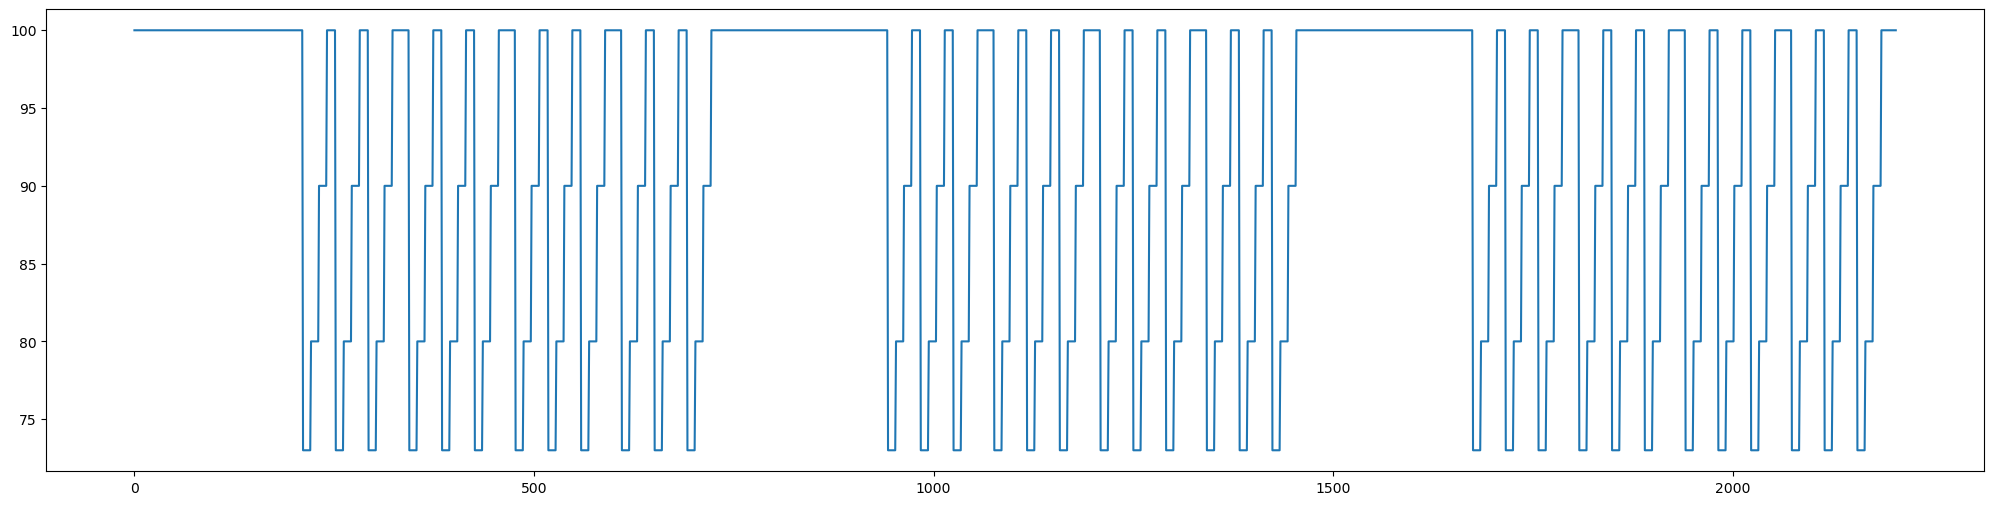

In [3]:
# Target variable analysis
# profile_df
profile_df['Valve_Condition'].plot(figsize=(25, 6))

In [4]:
# statistics of target values
profile_df['Valve_Condition'].value_counts().to_frame()

,count
Valve_Condition,
100,1125
73,360
80,360
90,360


<AxesSubplot:>

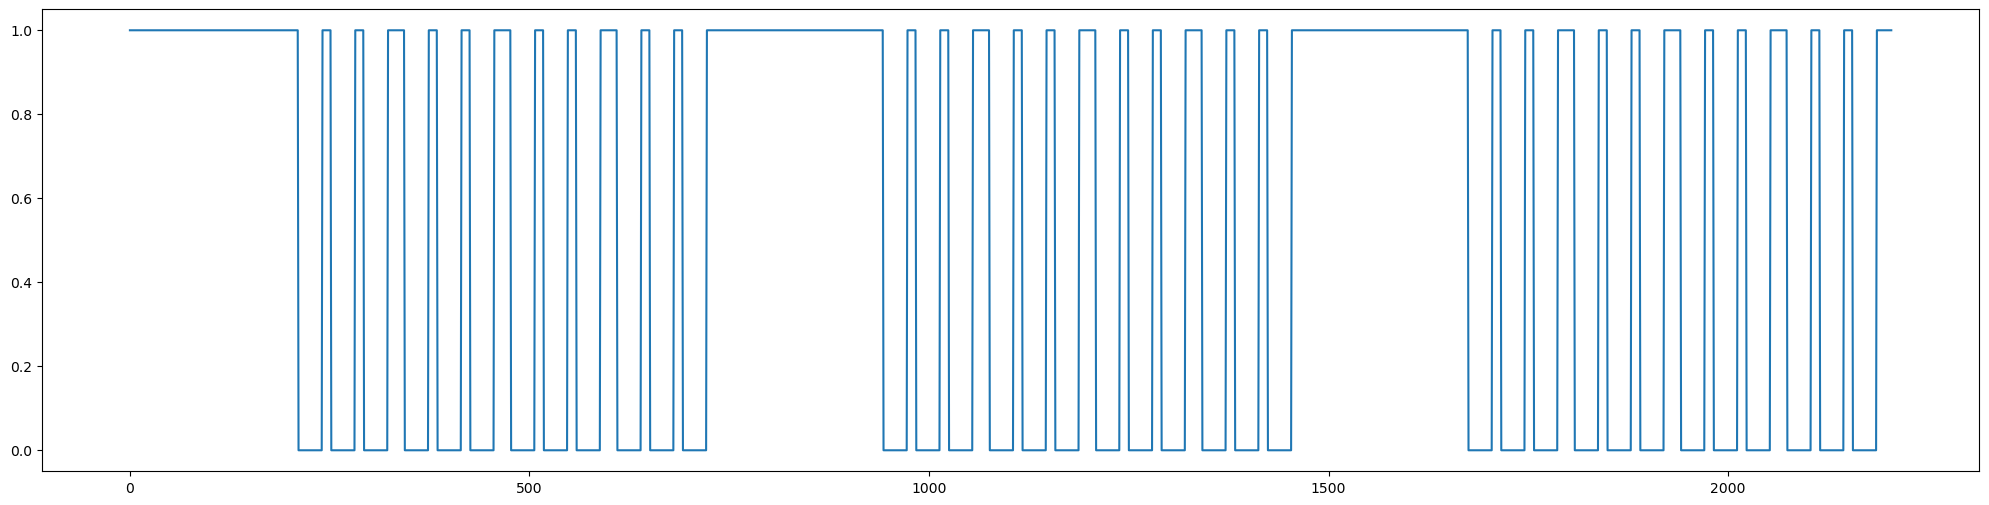

In [5]:
# Target variable analysis
# profile_df
profile_df['Target'].plot(figsize=(25, 6))

In [6]:
# statistics of target values
profile_df['Target'].value_counts().to_frame()


,count
Target,
1,1125
0,1080


EDA : 
FS1

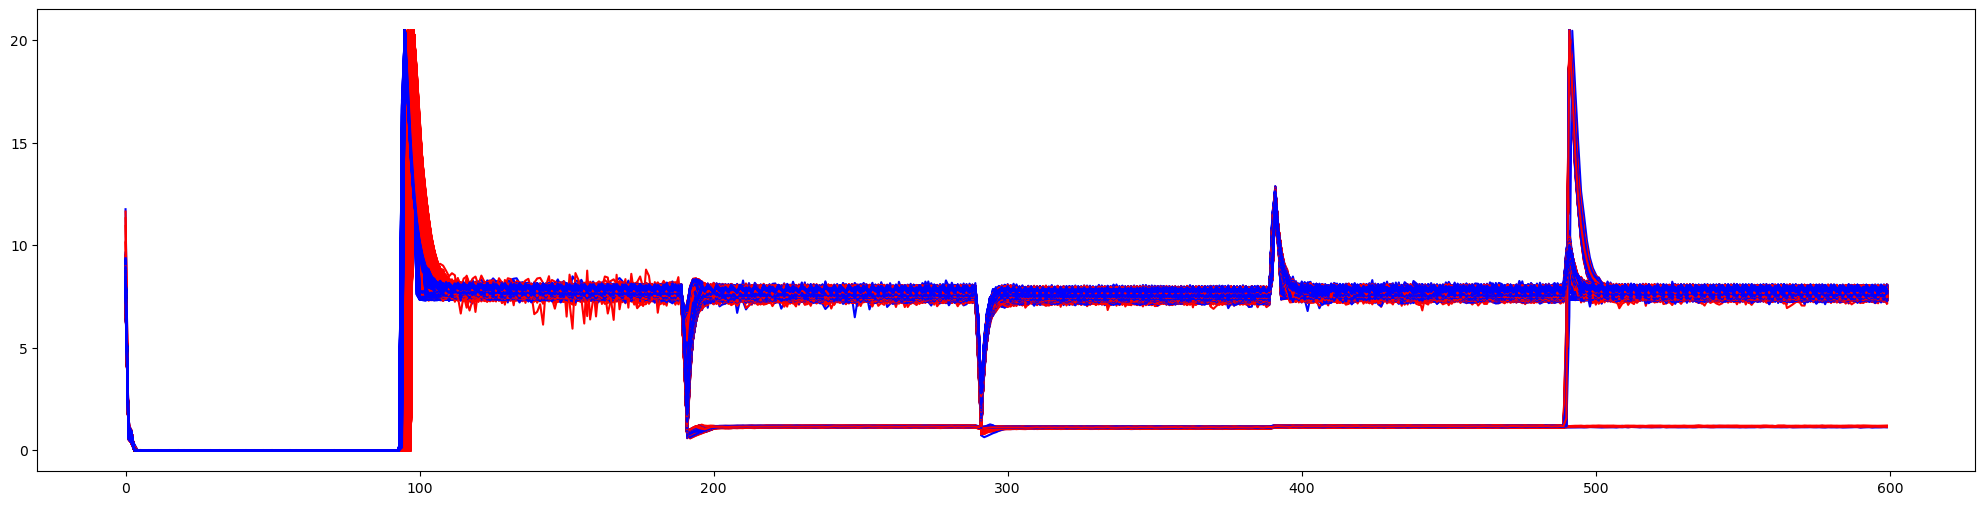

In [7]:
fig, ax = plt.subplots(figsize=(25, 6))

for i, s in data.get(c_DATA_FS1).iterrows():
    c = 'r' if profile_df['Target'][i] == 0 else "b"
    ax.plot(s, c=c)

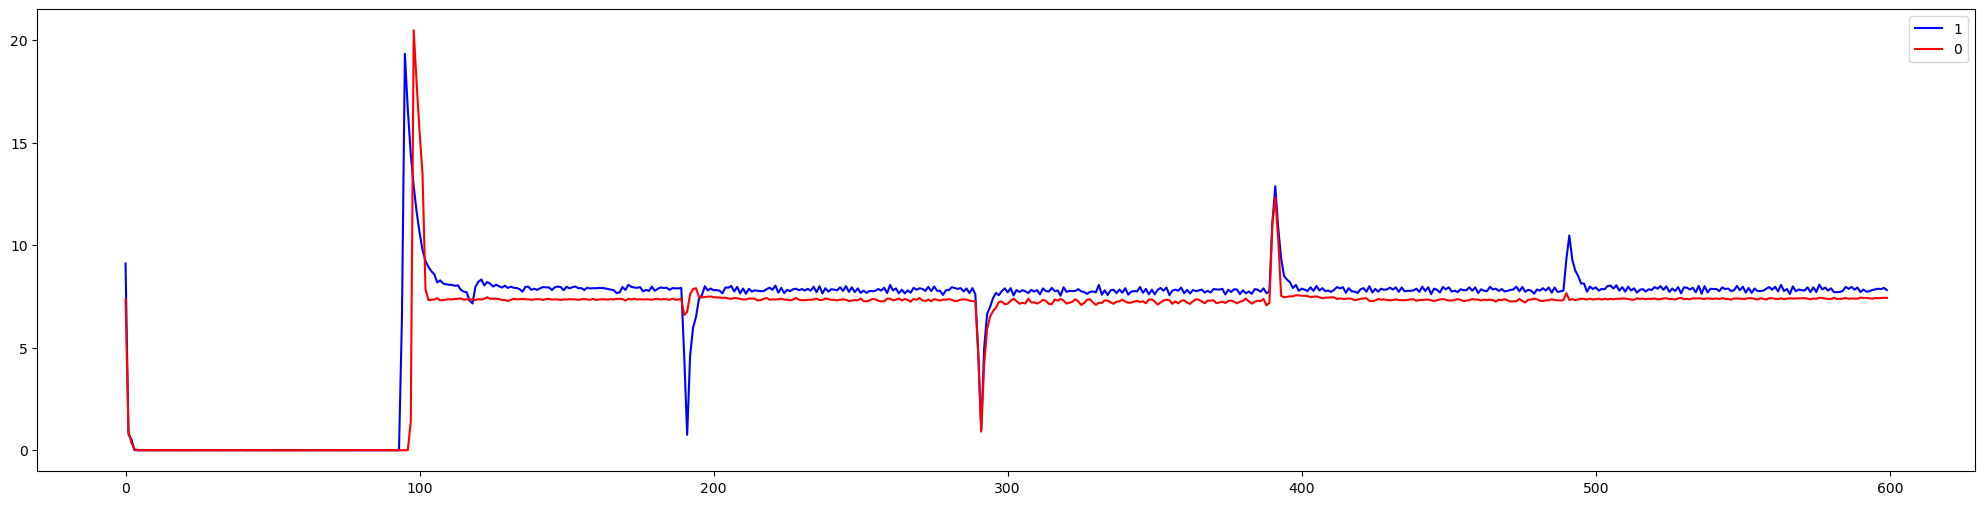

In [8]:
fig, ax = plt.subplots(figsize=(25, 6))

a = profile_df['Target'][profile_df['Target']==1].index[7]
b = profile_df['Target'][profile_df['Target']==0].index[7]

ax.plot(data.get(c_DATA_FS1).iloc[a], c='b', label=profile_df['Target'][a])
ax.plot(data.get(c_DATA_FS1).iloc[b], c='r', label=profile_df['Target'][b])

ax.legend()
plt.show()

EDA : 
PS2

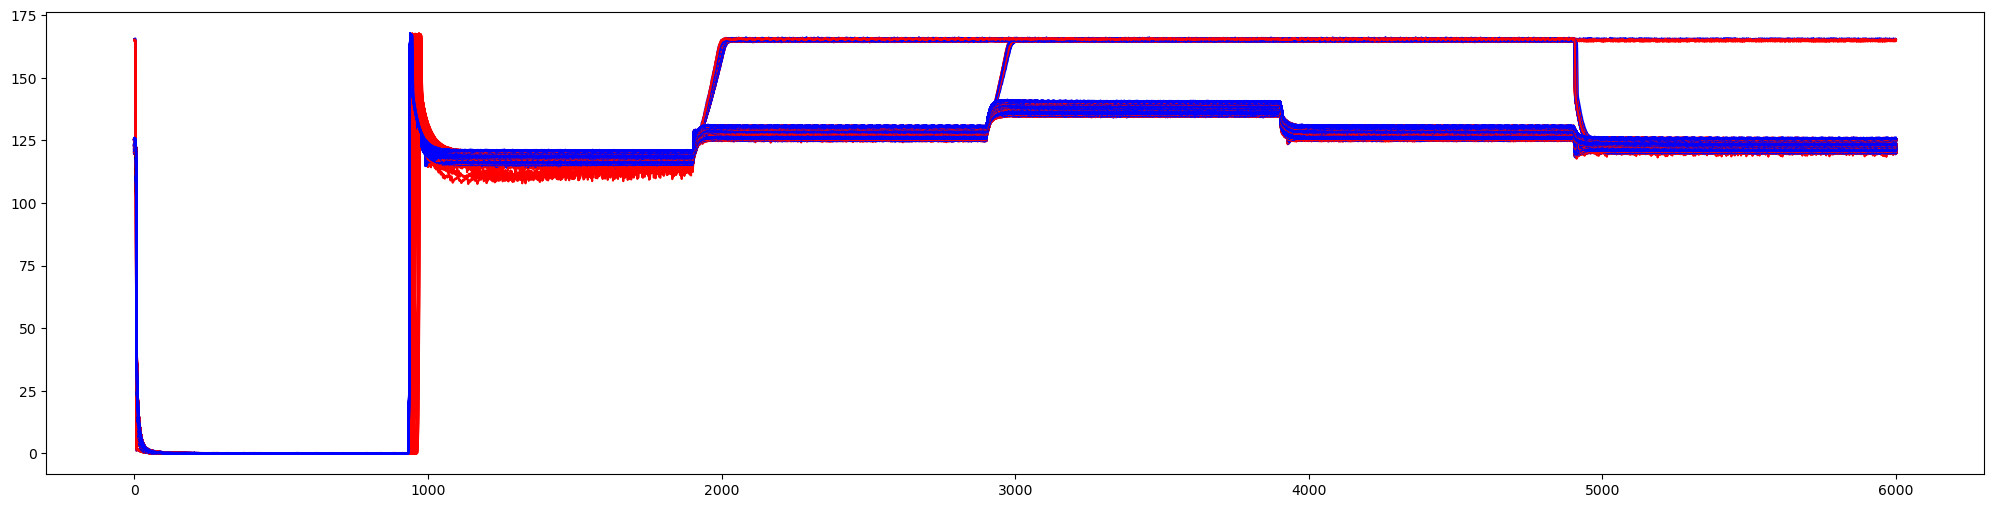

In [9]:
fig, ax = plt.subplots(figsize=(25, 6))

for i, s in data.get(c_DATA_PS2).iterrows():
    c = 'r' if profile_df['Target'][i] == 0 else "b"
    ax.plot(s, c=c)

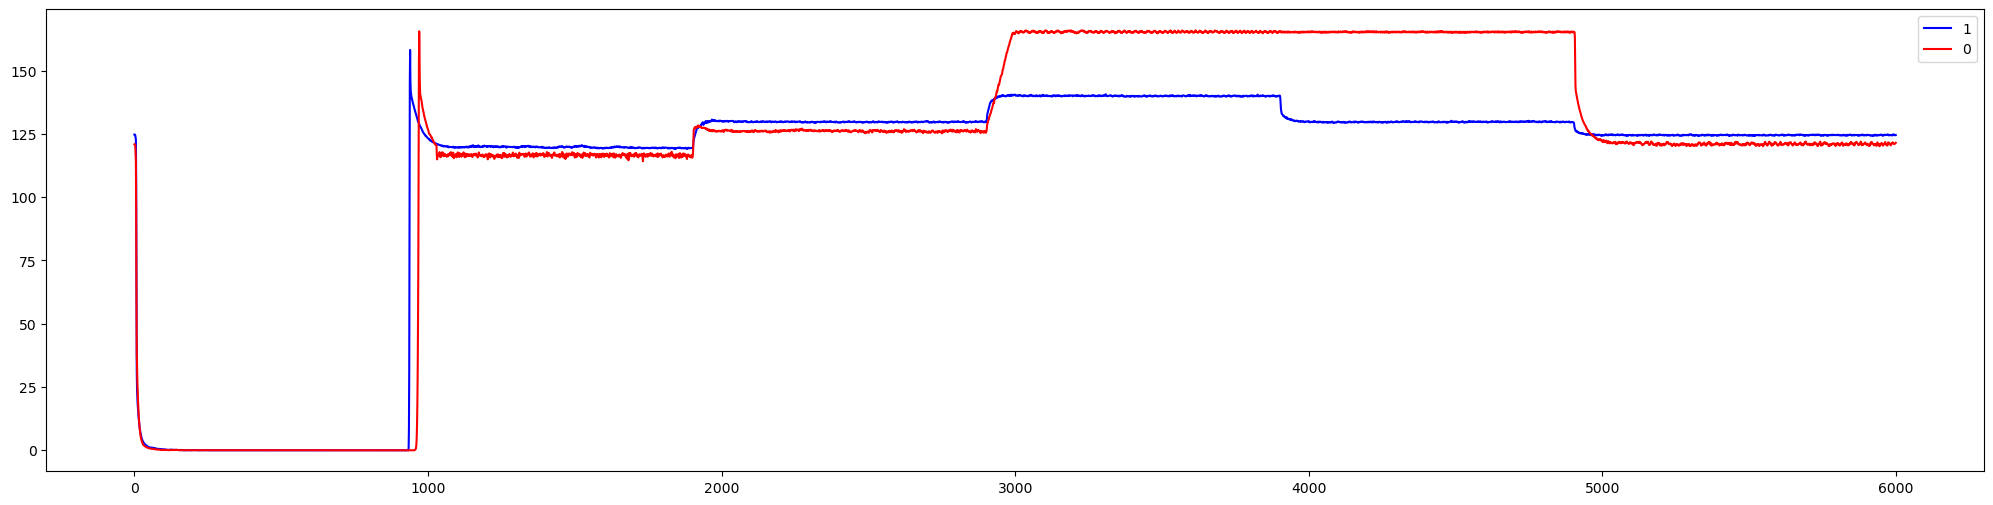

In [10]:
fig, ax = plt.subplots(figsize=(25, 6))

a = profile_df['Target'][profile_df['Target']==1].index[4]
b = profile_df['Target'][profile_df['Target']==0].index[4]

ax.plot(data.get(c_DATA_PS2).iloc[a], c='b', label=profile_df['Target'][a])
ax.plot(data.get(c_DATA_PS2).iloc[b], c='r', label=profile_df['Target'][b])

ax.legend()
plt.show()

[2026-01-01 03:12:23,985 | DEBUG]	findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=18.0.
[2026-01-01 03:12:23,986 | DEBUG]	findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
[2026-01-01 03:12:23,986 | DEBUG]	findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335
[2026-01-01 03:12:23,986 | DEBUG]	findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 1.05
[2026-01-01 03:12:23,987 | DEBUG]	findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335
[2026-01-01 03:12:23,987 | DEBUG]	findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal 700 normal>) = 10.335
[2026-01-01 03:12:23,987 | DEBUG]	findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
[2026-01-01 03:12:23,988 | DEBUG]	findfont: score(<Font 'STIXSizeThreeSym' (STIXSizTh

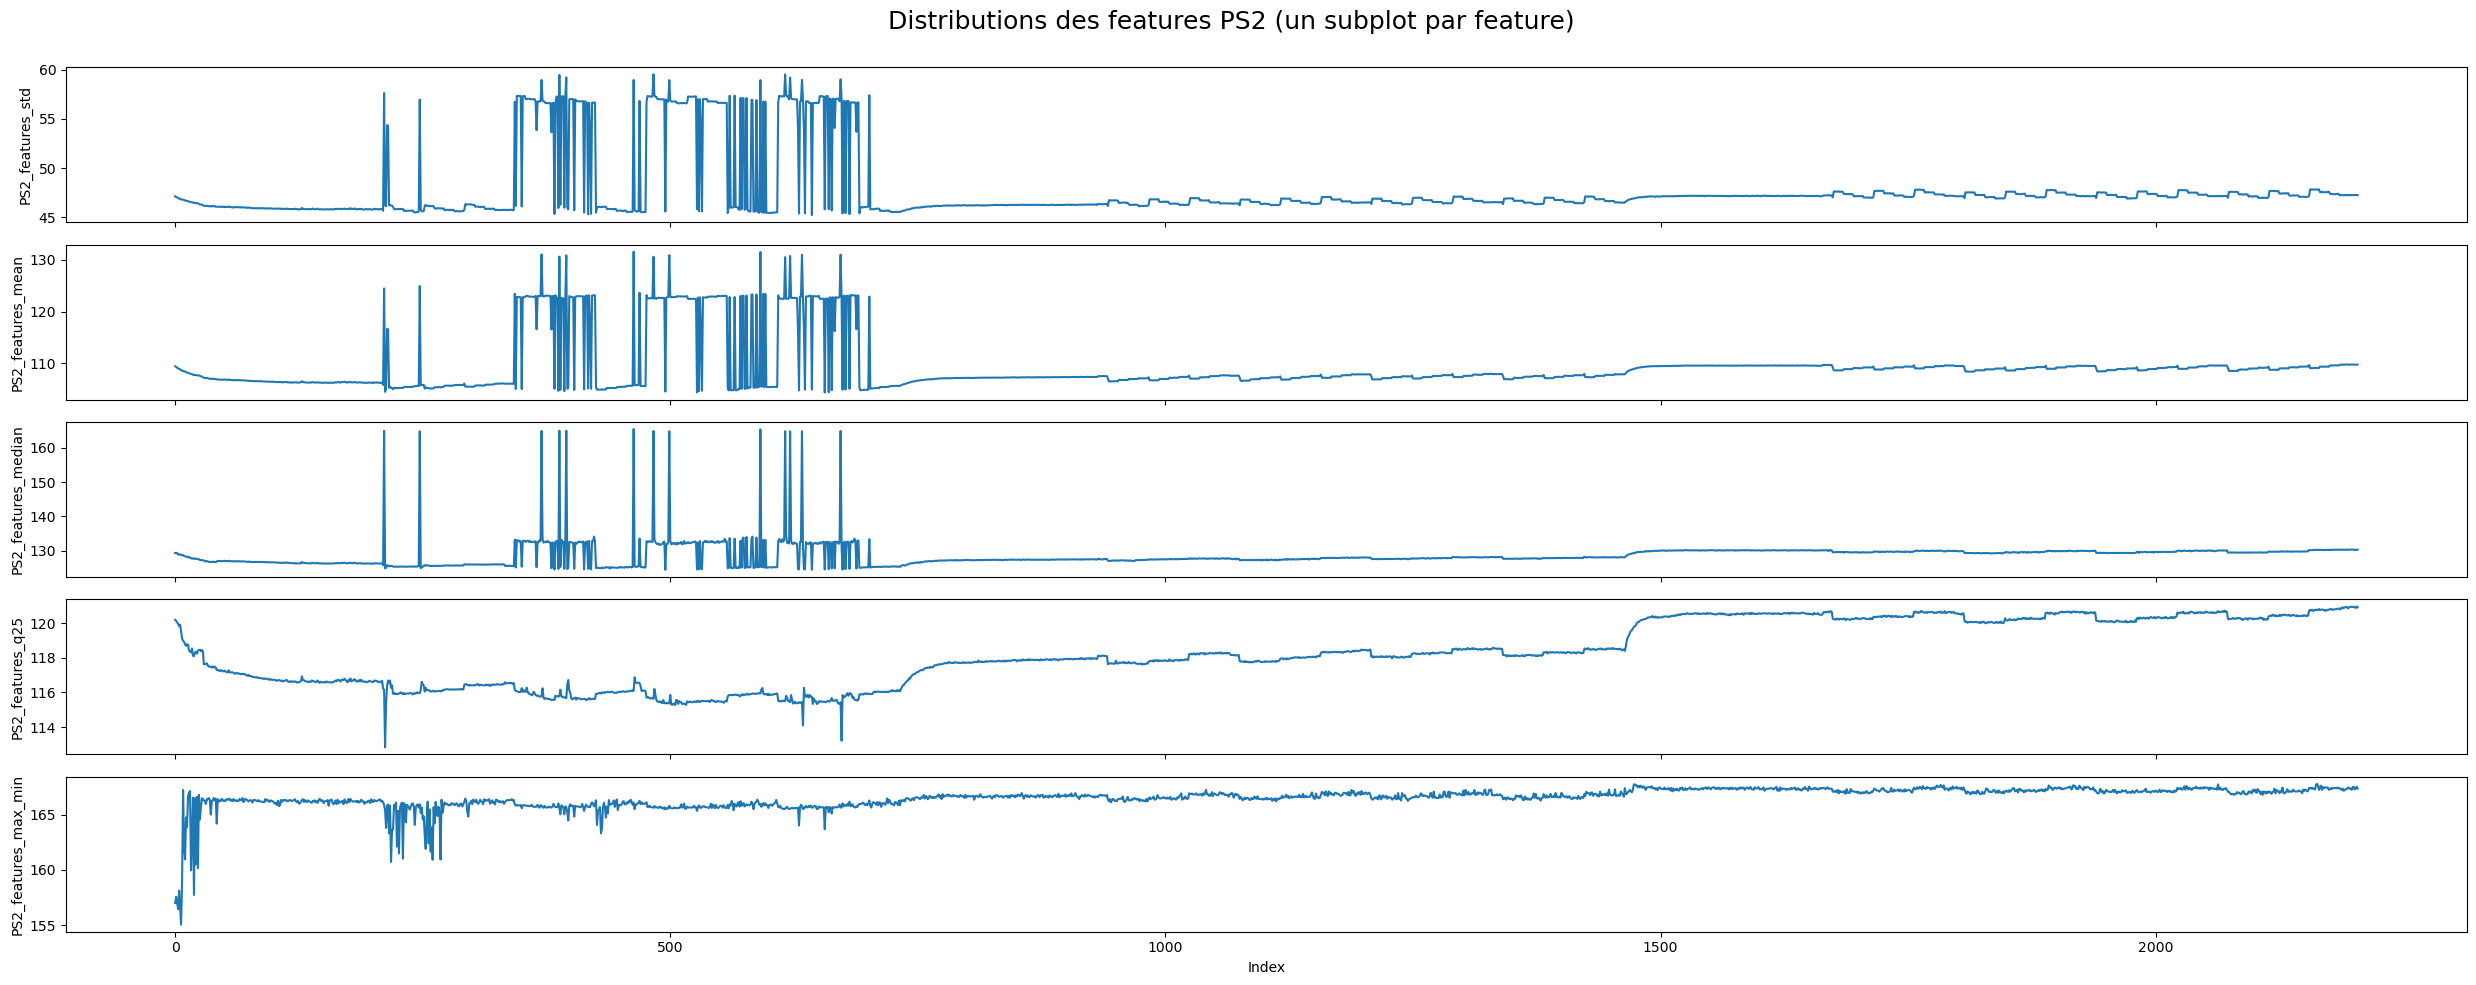

In [11]:
# Visualiser les distributions des features PS2 via des subplots
num_features = len(ps2_features.columns)
fig, axes = plt.subplots(num_features, 1, figsize=(25, 2*num_features), sharex=True)
if num_features == 1:
    axes = [axes]
for idx, col in enumerate(ps2_features.columns):
    axes[idx].plot(ps2_features[col], color='tab:blue')
    axes[idx].set_ylabel(col)
axes[-1].set_xlabel("Index")
fig.suptitle("Distributions des features PS2 (un subplot par feature)", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

[2026-01-01 03:12:24,247 | DEBUG]	locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x0000020DAA8B1FA0>
[2026-01-01 03:12:24,248 | DEBUG]	Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x0000020DAA8B1FA0> on colorbar
[2026-01-01 03:12:24,248 | DEBUG]	Setting pcolormesh
[2026-01-01 03:12:24,262 | DEBUG]	findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
[2026-01-01 03:12:24,262 | DEBUG]	findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
[2026-01-01 03:12:24,263 | DEBUG]	findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335
[2026-01-01 03:12:24,263 | DEBUG]	findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 1.05
[2026-01-01 03:12:24,263 | DEBUG]	findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335
[2026-01-01 03:12:24,

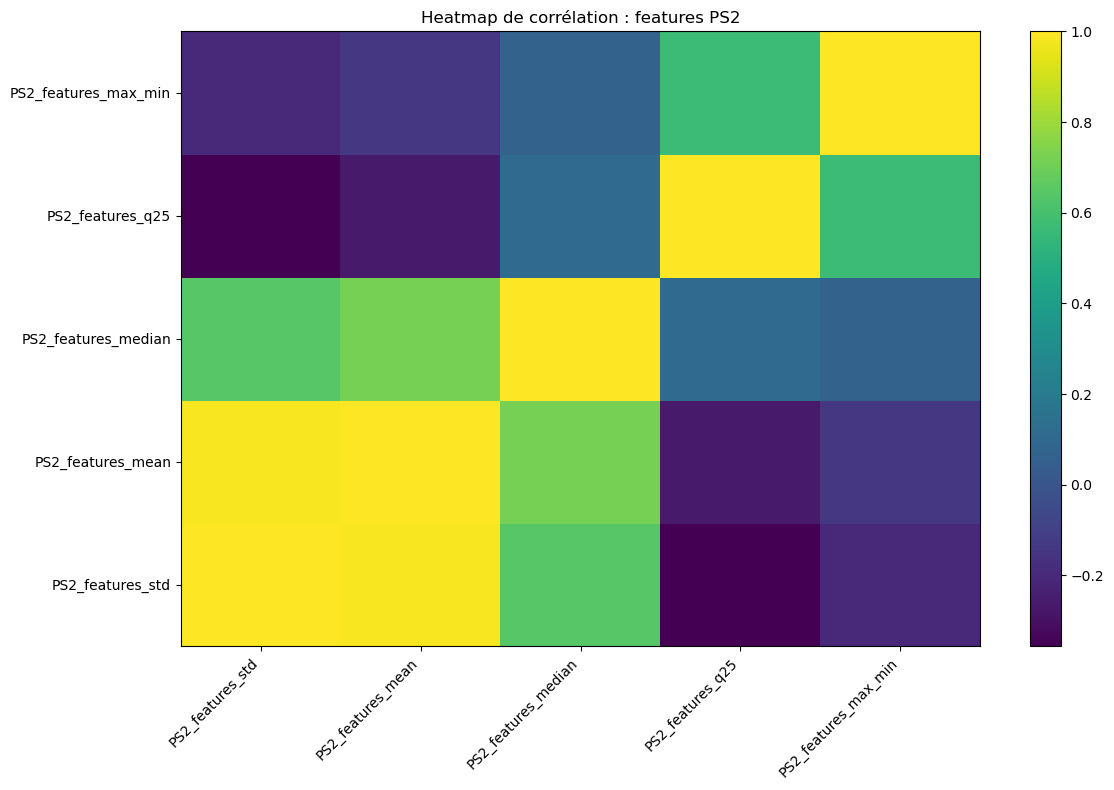

In [12]:
# Heatmap de corrélation des features PS2 (en utilisant plt.pcolor)
plt.figure(figsize=(12, 8))
corr_ps2 = ps2_features.corr()

plt.pcolor(corr_ps2, cmap='viridis')
plt.colorbar()
plt.xticks(np.arange(0.5, len(corr_ps2.columns), 1), corr_ps2.columns, rotation=45, ha='right')
plt.yticks(np.arange(0.5, len(corr_ps2.index), 1), corr_ps2.index)
plt.title("Heatmap de corrélation : features PS2")
plt.tight_layout()
plt.show()


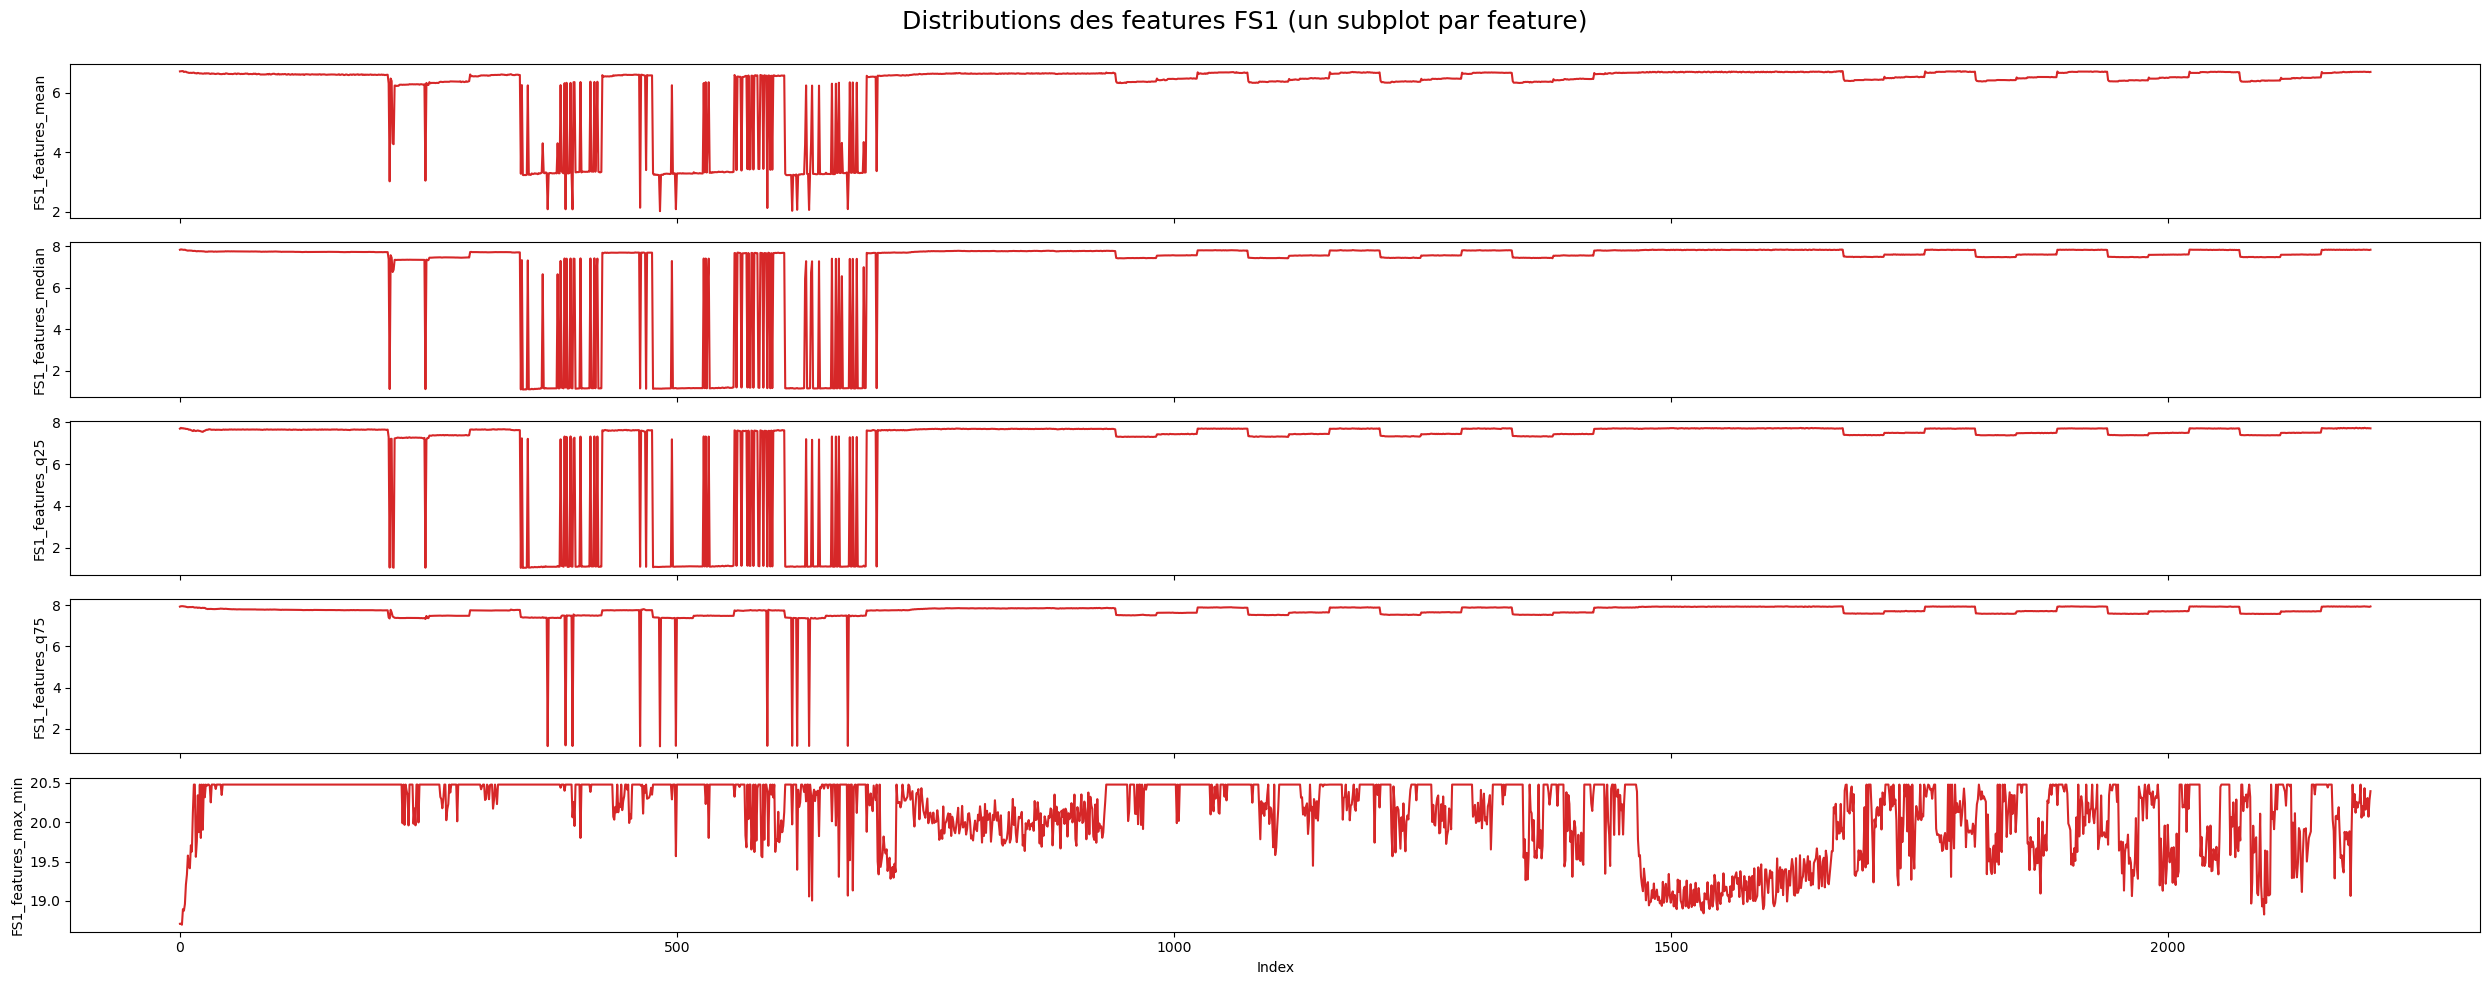

In [13]:
# Visualiser les distributions des features FS1 via des subplots
num_features = len(fs1_features.columns)
fig, axes = plt.subplots(num_features, 1, figsize=(25, 2*num_features), sharex=True)
if num_features == 1:
    axes = [axes]
for idx, col in enumerate(fs1_features.columns):
    axes[idx].plot(fs1_features[col], color='tab:red')
    axes[idx].set_ylabel(col)
axes[-1].set_xlabel("Index")
fig.suptitle("Distributions des features FS1 (un subplot par feature)", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

[2026-01-01 03:12:24,690 | DEBUG]	locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x0000020DAAB29730>
[2026-01-01 03:12:24,690 | DEBUG]	Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x0000020DAAB29730> on colorbar
[2026-01-01 03:12:24,690 | DEBUG]	Setting pcolormesh


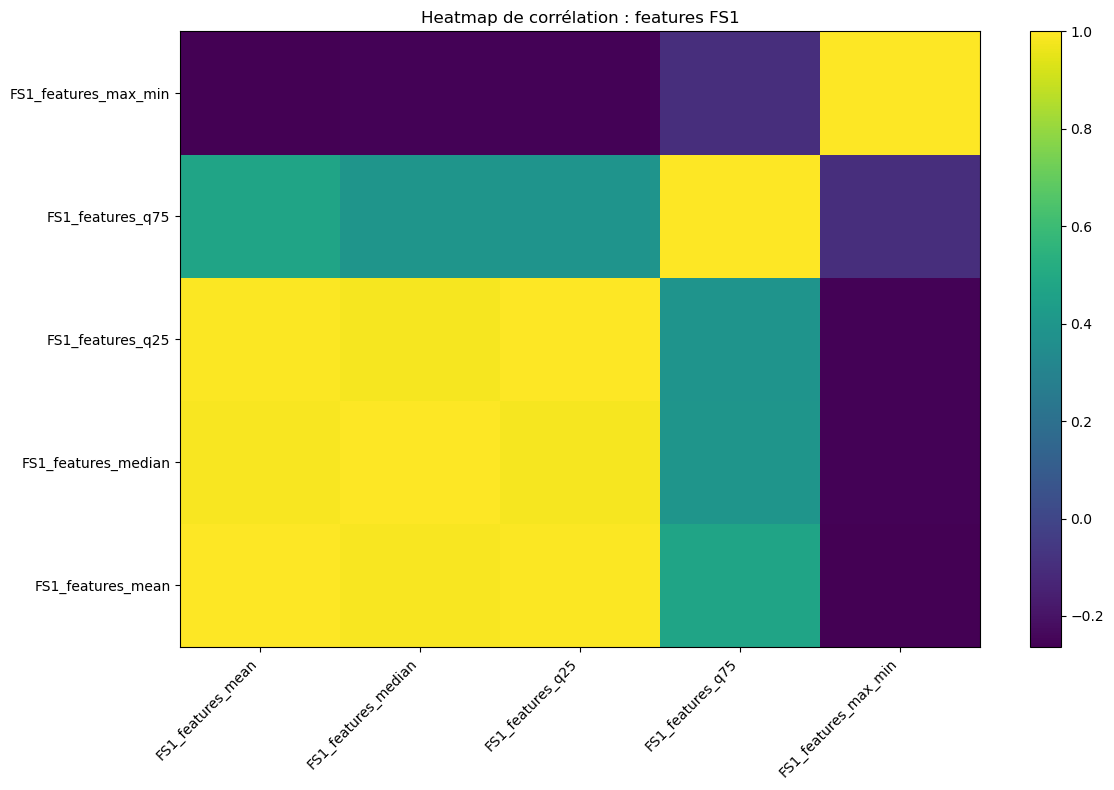

In [14]:
# Heatmap de corrélation des features FS1 (en utilisant plt.pcolor)
plt.figure(figsize=(12, 8))
corr_fs1 = fs1_features.corr()

plt.pcolor(corr_fs1, cmap='viridis')
plt.colorbar()
plt.xticks(np.arange(0.5, len(corr_fs1.columns), 1), corr_fs1.columns, rotation=45, ha='right')
plt.yticks(np.arange(0.5, len(corr_fs1.index), 1), corr_fs1.index)
plt.title("Heatmap de corrélation : features FS1")
plt.tight_layout()
plt.show()

[2026-01-01 03:12:35,453 | DEBUG]	locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x0000020DAAC72EB0>
[2026-01-01 03:12:35,454 | DEBUG]	Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x0000020DAAC72EB0> on colorbar
[2026-01-01 03:12:35,454 | DEBUG]	Setting pcolormesh


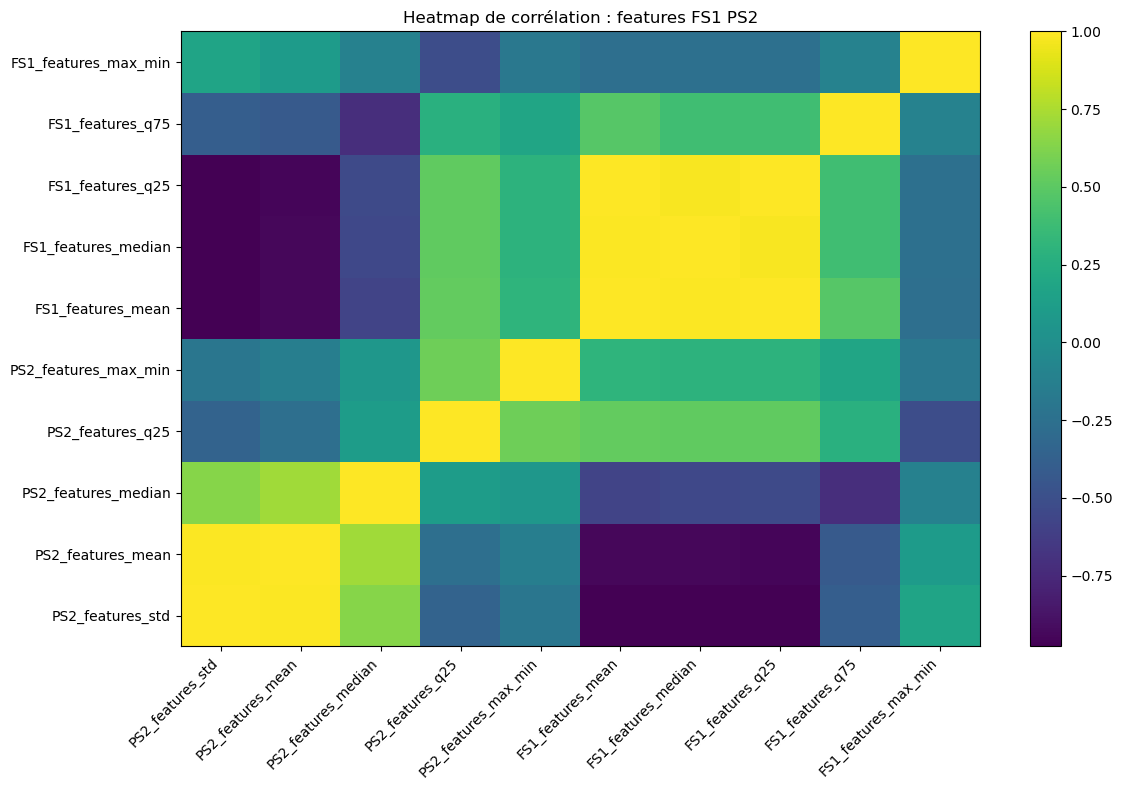

In [15]:
ata_df = pd.concat([ps2_features, fs1_features], axis=1)

# Heatmap de corrélation des features FS1 (en utilisant plt.pcolor)
plt.figure(figsize=(12, 8))
corr_fs1 = ata_df.corr()

plt.pcolor(corr_fs1, cmap='viridis')
plt.colorbar()
plt.xticks(np.arange(0.5, len(corr_fs1.columns), 1), corr_fs1.columns, rotation=45, ha='right')
plt.yticks(np.arange(0.5, len(corr_fs1.index), 1), corr_fs1.index)
plt.title("Heatmap de corrélation : features FS1 PS2")
plt.tight_layout()
plt.show()